In [1]:
import os
import numpy as np
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
import cv2 as cv
import os

def input_data(folder_path, output_data):
    for dirs in os.listdir(folder_path):
        class_name = dirs
        new_path = os.path.join(folder_path, class_name)
        for img in os.listdir(new_path):
            img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_GRAYSCALE)
            resize = cv.resize(img_arr, (128, 128))
            output_data.append([resize, class_name])
    return output_data

# Usage example
folder_path = 'E:\Feature Extraction\Melanoma\Test'  # Replace this with the actual path to your dataset
output_data = []

# Call the function to import the data
input_data(folder_path, output_data)

# Now the output_data list contains the imported data
print("Number of data points:", len(output_data))


Number of data points: 815


In [3]:
def input_data(folder_path, output_data):
    for dirs in os.listdir(folder_path):
        class_name = dirs
        new_path = os.path.join(folder_path, class_name)
        for img in os.listdir(new_path):
            img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_GRAYSCALE)
            resize = cv.resize(img_arr, (128, 128))
            output_data.append([resize, class_name])
    return output_data

# Usage example
folder_path = 'E:\Feature Extraction\Melanoma\Train'  # Replace this with the actual path to your dataset
output_data = []

# Call the function to import the data
input_data(folder_path, output_data)

# Now the output_data list contains the imported data
print("Number of data points:", len(output_data))


Number of data points: 8201


In [4]:
train_data = input_data("E:\Feature Extraction\Melanoma\Train", [])
test_data = input_data("E:\Feature Extraction\Melanoma\Test", [])

In [5]:
np.random.shuffle(train_data)  
np.random.shuffle(test_data)

In [6]:
train_images = []              #separating the image and labels from the train_data list
train_labels = []
for features, labels in train_data:
  train_images.append(features)
  train_labels.append(labels)

In [7]:
test_images = []    #separating the image and labels from the test_data list
test_labels = []
for features, labels in test_data:
  test_images.append(features)
  test_labels.append(labels)

In [8]:
label_enc = LabelEncoder()           # encoding the labels 
train_labels = label_enc.fit_transform(train_labels)
test_labels = label_enc.transform(test_labels)

In [9]:
train_images = np.array(train_images)    #converting the images and labels into numpy array
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
train_images = train_images/255    # normalizing the image pixels
test_images = test_images/255

In [11]:
train_images = np.expand_dims(train_images, axis=3)      # adding a dimension on the images
test_images = np.expand_dims(test_images, axis=3)

In [12]:
print(f"Shape of the train images {train_images.shape}")
print(f"Shape of the train labels {train_labels.shape}")
print(f"Shape of the test images {test_images.shape}")
print(f"Shape of the test labels {test_labels.shape}")

Shape of the train images (8201, 128, 128, 1)
Shape of the train labels (8201,)
Shape of the test images (815, 128, 128, 1)
Shape of the test labels (815,)


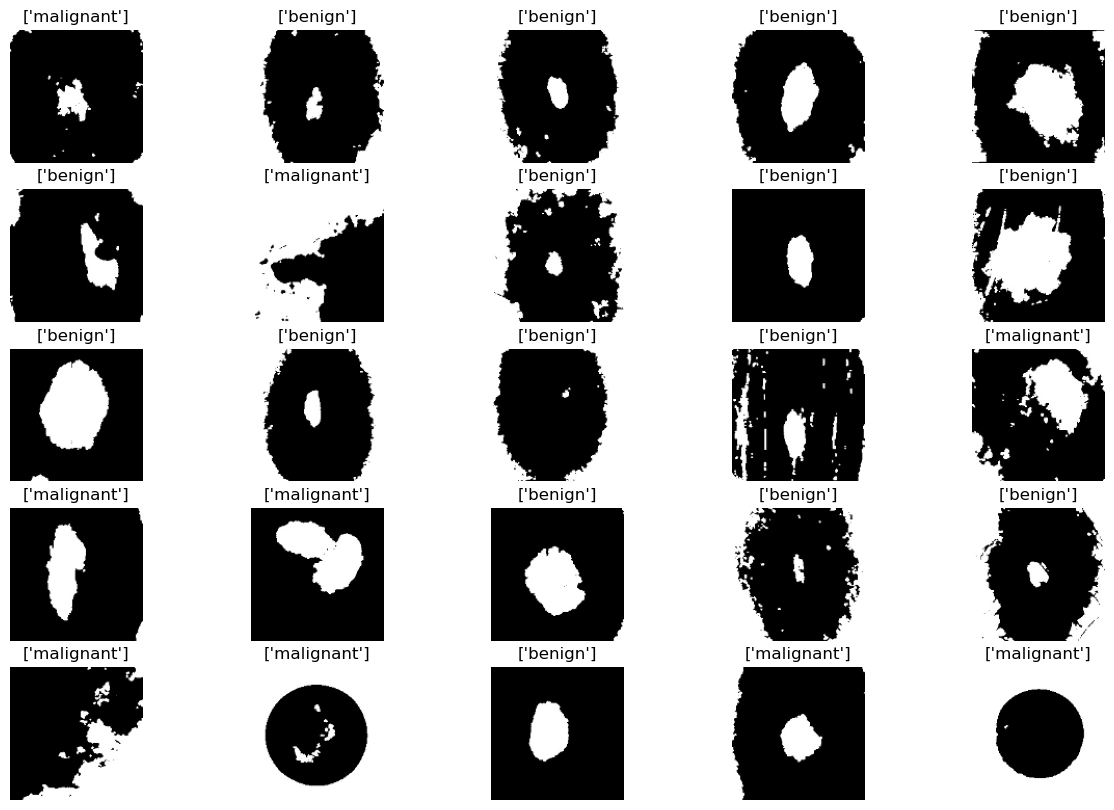

In [13]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(test_images[i], cmap='gray')
  plt.title(f"{label_enc.inverse_transform([test_labels[i]])}")
  plt.axis("off")

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

Accuracy of Random Forest: 0.8638036809815951
Confusion Matrix (Random Forest):
[[347  66]
 [ 45 357]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       413
           1       0.84      0.89      0.87       402

    accuracy                           0.86       815
   macro avg       0.86      0.86      0.86       815
weighted avg       0.86      0.86      0.86       815

F1 Score (Random Forest): 0.863760614951866


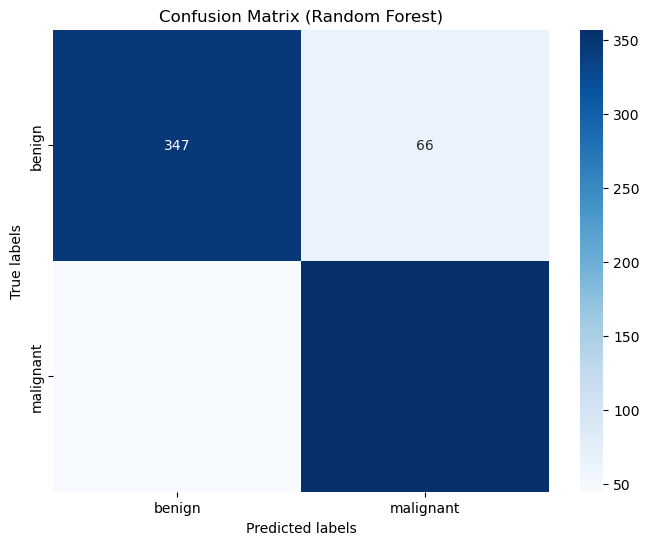

In [15]:
# Train Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(train_images.reshape(-1, 128*128), train_labels)

# Predictions
rf_predictions = rf_model.predict(test_images.reshape(-1, 128*128))

# Calculate accuracy
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("Accuracy of Random Forest:", rf_accuracy)

# Confusion matrix
cm_rf = confusion_matrix(test_labels, rf_predictions)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Classification report
cr_rf = classification_report(test_labels, rf_predictions)
print("Classification Report (Random Forest):")
print(cr_rf)

# Calculate F1 score
f1_rf = f1_score(test_labels, rf_predictions, average='weighted')
print("F1 Score (Random Forest):", f1_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


Accuracy of SVM: 0.811042944785276
Confusion Matrix (SVM):
[[336  77]
 [ 77 325]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       413
           1       0.81      0.81      0.81       402

    accuracy                           0.81       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.81      0.81      0.81       815

F1 Score: 0.811042944785276


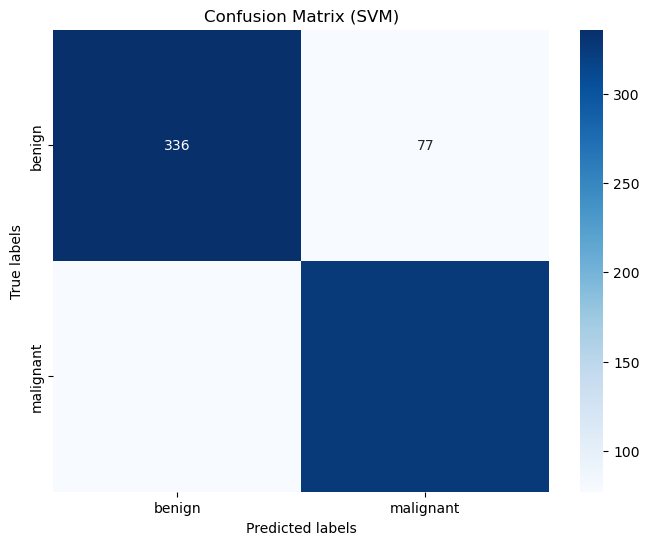

In [16]:
from sklearn.svm import SVC
# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(train_images.reshape(-1, 128*128), train_labels)

# Predictions
svm_predictions = svm_model.predict(test_images.reshape(-1, 128*128))

# Calculate accuracy
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print("Accuracy of SVM:", svm_accuracy)

# Confusion matrix
cm_svm = confusion_matrix(test_labels, svm_predictions)
print("Confusion Matrix (SVM):")
print(cm_svm)

# Classification report
cr_svm = classification_report(test_labels, svm_predictions)
print("Classification Report (SVM):")
print(cr_svm)

# Calculate F1 score
f1 = f1_score(test_labels, svm_predictions, average='weighted')
print("F1 Score:", f1)


# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM)')
plt.show()